# Uber Rides Prediction Model

Importing all required libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sweetviz as sv
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
import warnings
warnings.filterwarnings('ignore')

reading the taxi dataset

In [7]:
df=pd.read_csv('taxxi.csv')

In [9]:
df.head()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
0,15,1800000,5800,50,192000
1,15,1790000,6200,50,190400
2,15,1780000,6400,60,191200
3,25,1778000,6500,60,177600
4,25,1750000,6550,60,176800


Checking null values

In [4]:
df.isna().sum()

Priceperweek              0
Population                0
Monthlyincome             0
Averageparkingpermonth    0
Numberofweeklyriders      0
dtype: int64

Performing EDA 

In [9]:
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
df.describe()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
count,27.000000,2.700000e+01,27.000000,27.000000,27.000000
mean,49.925926,1.680111e+06,11063.259259,107.037037,160026.074074
std,27.627921,6.780307e+04,3416.627944,45.346089,21301.097303
min,15.000000,1.590000e+06,5800.000000,50.000000,115696.000000
25%,27.500000,1.617500e+06,8400.000000,75.000000,149600.000000
50%,40.000000,1.695000e+06,11600.000000,100.000000,161600.000000
75%,75.000000,1.725000e+06,13888.000000,140.000000,176000.000000
max,102.000000,1.800000e+06,16200.000000,200.000000,192000.000000


Shape of your Data Set: (27, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


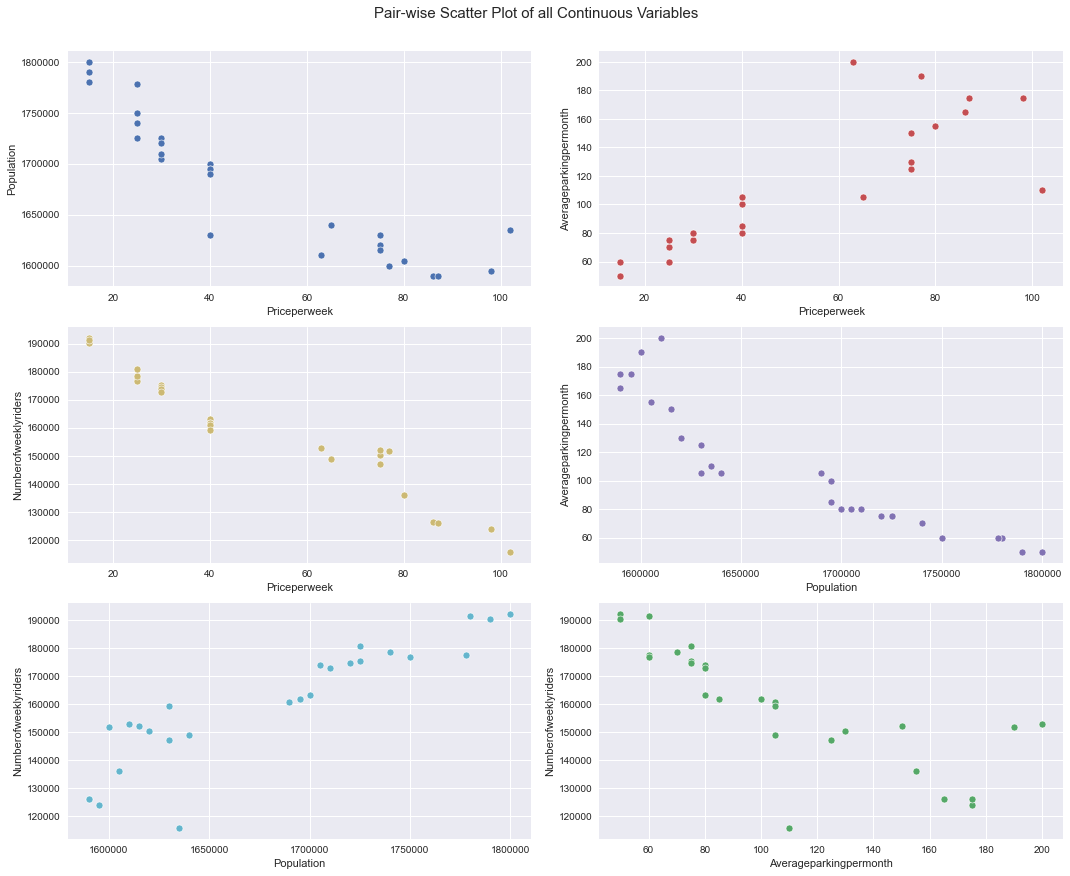

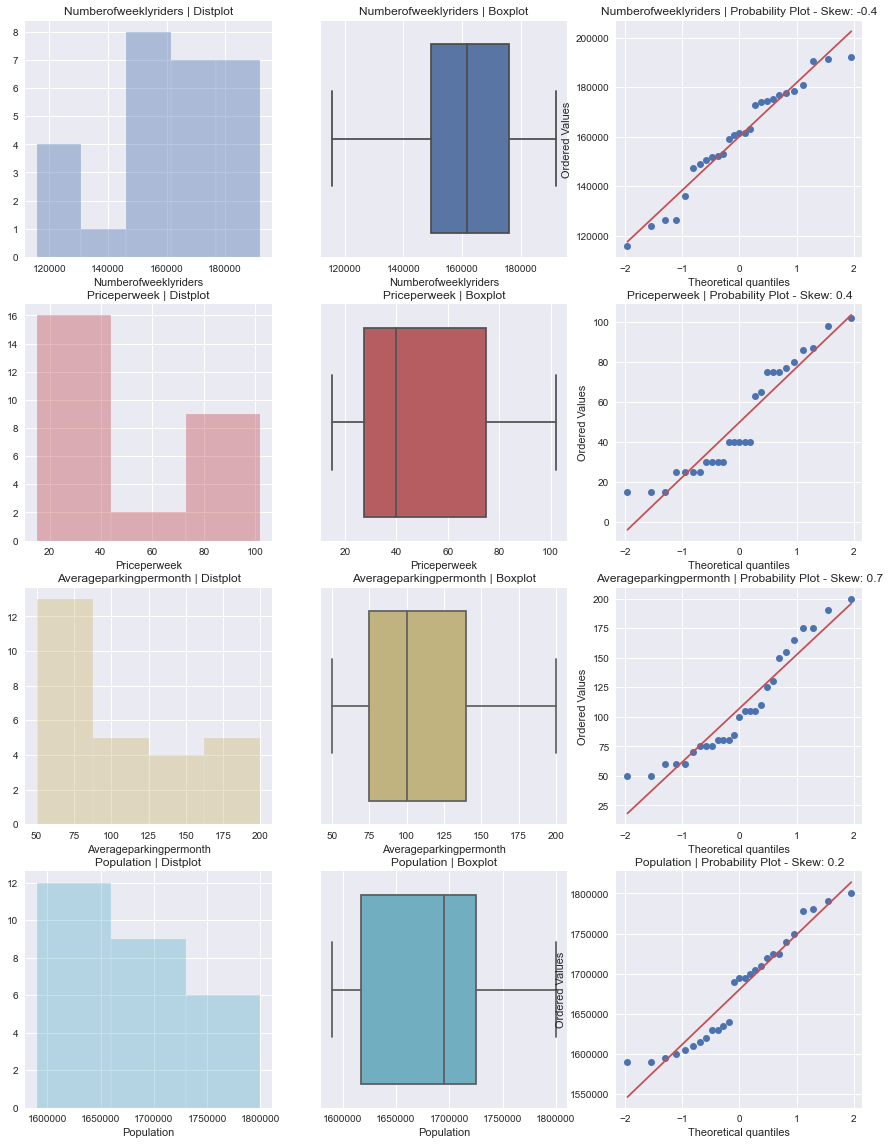

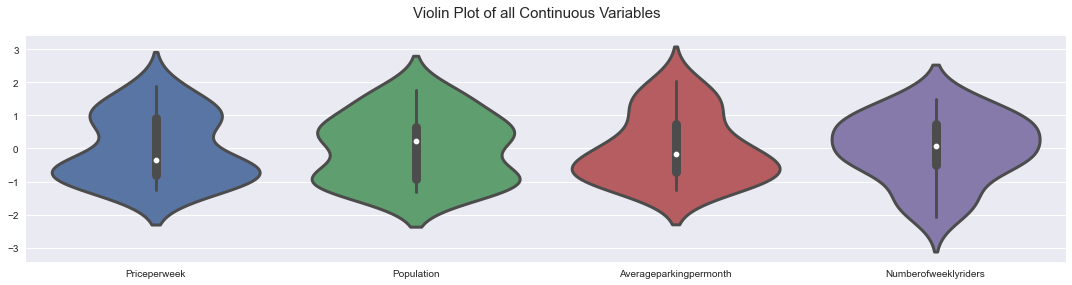

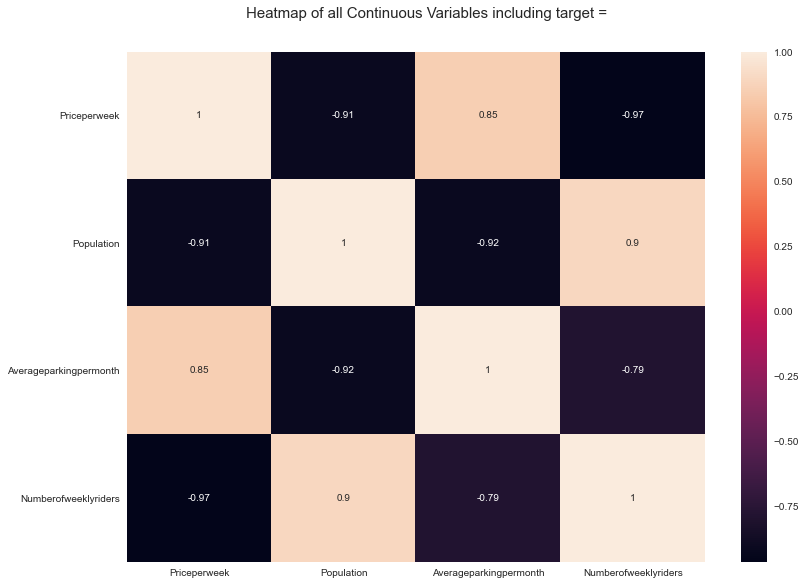

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 5.622

 ###################### VISUALIZATION Completed ########################


In [18]:
df = AV.AutoViz('taxxi.csv')

In [7]:
df_x=df.iloc[:,0:-1].values

In [9]:
df_y=df.iloc[:,-1].values

In [13]:
df_y

array([192000, 190400, 191200, 177600, 176800, 178400, 180800, 175200,
       174400, 173920, 172800, 163200, 161600, 161600, 160800, 159200,
       148800, 115696, 147200, 150400, 152000, 136000, 126240, 123888,
       126080, 151680, 152800], dtype=int64)

Building a Model

In [19]:
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3,random_state=0)

In [21]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
print("Train Score:",reg.score(X_train,y_train))
print("Test Score",reg.score(X_test,y_test))

Train Score: 0.9428364724316813
Teat Score 0.9157379222488221


“Pickling” is the process whereby a Python object hierarchy is converted into a byte stream

In [26]:
pickle.dump(reg,open('taxi.pkl','wb'))

In [27]:
model=pickle.load(open('taxi.pkl','rb'))

In [29]:
a=model.predict([[80,1770000,6000,85]])

In [30]:
a

array([153448.45038985])

further the model is been made using flask and the link can be used to predict the total rides